<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression
'''
We try to predict the likelihood(or probablilty) of something happening

#The line equation
```
y = b0+b1*x
```
and

##The Sigmoid Function
``` 
p = 1/(1+(e^(-y)))
```
then


##Formula for logistic regression

``` 
ln(p/(1-p)) = b0+b1*x
```

Probablity is used as a score
it is same as linear regression but with a sigmoid function


'''

#Data Preprocessing

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#Exploratory Data Analysis

Observing the relationship between the estimated salary and Purchased

In [23]:
plt.figure(figsize=(12,10))
import plotly.express as px
px.scatter(df, x=df['EstimatedSalary'],y=df['Purchased'])

<Figure size 864x720 with 0 Axes>

Observing the relationship between age and purchased

In [24]:
px.scatter(df, x=df['Age'],y=df['Purchased'])

Observing the relationship all together

'''
Clearly Older people have more salary so they purchased more products

As can be shown by the image below
'''

In [31]:
px.scatter(df, x=df['EstimatedSalary'],y=df['Purchased'],color = df['Age'])

In [27]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


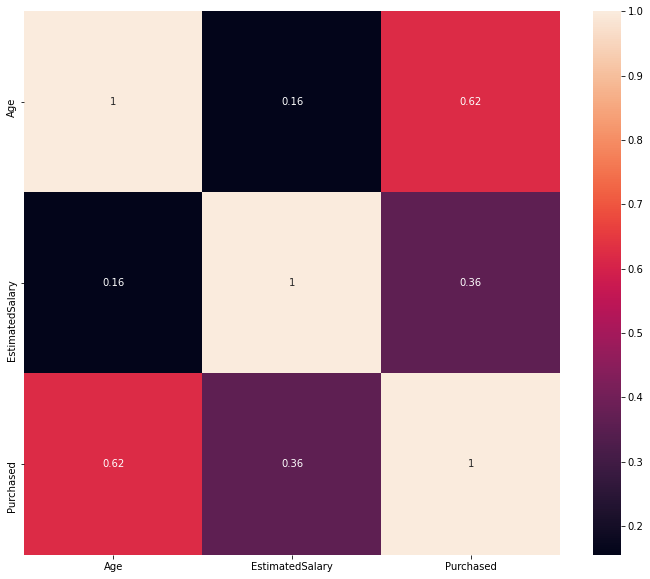

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

#Splitting the Data into Training and Test Set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Logistic Regression model on the Training Set

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Predicting a new Result

In [49]:
lr.predict(sc.transform([[30,87000]]))

array([0])

#Predicting the test set results

In [50]:
test_pred = lr.predict(X_test)

#Making the Confusion Matrix

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [54]:
print(classification_report(y_test, test_pred))
print('\n')
print(confusion_matrix(y_test, test_pred))
print('\n')
print(accuracy_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



[[57  1]
 [ 5 17]]


0.925


#Visualizing the Training Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


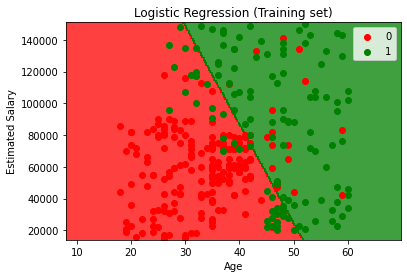

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


#Visualizing the Test Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


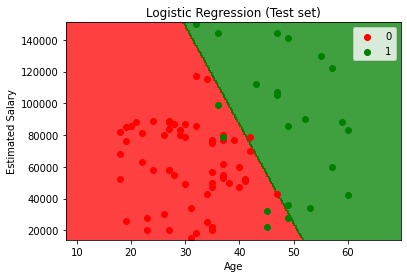

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
